**DOMAIN PROJECT**

Domain yang dipilih untuk proyek machine learning ini adalah Keuangan, dengan judul Predictive Analytics : Predictive Analytics BRI Dividen.

**Latar Belakang**
Dalam berinvestasi di pasar saham, investor pada dasarnya memiliki banyak pilihan indeks yang bisa digunakan sebagai acuan perdagangan. Indeks saham adalah ukuran statistik perubahan gerak harga dari kumpulan saham yang dipilih berdasarkan kriteria tertentu dan digunakan sebagai sarana tujuan investasi. Banyaknya saham yang diterbitkan oleh banyak perusahaan, maka dibuatlah indeks saham ini untuk memantau kinerja sebuah bursa secara umum. 

Pergerakan saham BRI yang cukup signifikan dan besarnya keuntungan yang ditawarkan, ternyata menarik banyak masyarakat untuk berkecimpung dalam forex market. Forex market memiliki fungsi pokok dalam membantu kelancaran lalu lintas pembayaran internasional.

Forex termasuk investasi kategori high risk dengan kata lain beresiko tinggi karena transaksi yang kurang tepat sasarang dapat langsung mengikis modal deposito dalam sebuah akun dengan cepat. Oleh karena itu, para trader harus mengetahui kapan harus masuk, berapa lama menunggu dan berapa kali harus melakukan pembelian/penjualan. Salah satu cara yang dapat dilakukan adalah dengan menggunakan teknik forecasting.

Forecasting adalah suatu teknik untuk meramalkan keadaan dimasa yang akan datang dengan menggunakan data-data yang telah ada di masa lalu. Hal ini termasuk dalam time series forecasting, dengan mendeteksi pola dan kecenderungan data time series kemudian memformulasikannya dalam suatu model, maka dapat digunakan untuk memprediksi data yang akan datang.

In [18]:
import pandas as pd
# import pandas_datareader as pdr
from pandas_datareader import data as pdr
import numpy as np
import datetime
import yfinance as yf

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
yf.pdr_override()


# from sklearn.decomposition import PCA

# from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
# from sklearn.metrics import mean_squared_error
# from sklearn.impute import SimpleImputer

# from sklearn.svm import SVR
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.neighbors import KNeighborsRegressor

In [19]:
# df = pd.read_csv('BBRI.JK.csv')
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=5*365)
assets = 'BBRI.JK'
df = pdr.get_data_yahoo(assets)
df.reset_index(inplace=True)
df

[*********************100%%**********************]  1 of 1 completed


Date         Open         High          Low        Close  \
0    2003-11-10    95.452896    99.998276    86.362144    88.634834   
1    2003-11-11    88.634834    90.907516    86.362144    90.907516   
2    2003-11-12    88.634834    95.452896    88.634834    95.452896   
3    2003-11-13    95.452896    95.452896    93.180206    95.452896   
4    2003-11-14    95.452896    95.452896    90.907516    95.452896   
...         ...          ...          ...          ...          ...   
5060 2024-04-03  5575.000000  5675.000000  5525.000000  5625.000000   
5061 2024-04-04  5650.000000  5750.000000  5650.000000  5700.000000   
5062 2024-04-05  5625.000000  5700.000000  5625.000000  5650.000000   
5063 2024-04-16  5375.000000  5575.000000  5350.000000  5350.000000   
5064 2024-04-17  5475.000000  5500.000000  5300.000000  5300.000000   

        Adj Close      Volume  
0       43.729183  5658651738  
1       44.850452  3232466332  
2       47.092976  2203244555  
3       47.092976  1309077610  
4       47.092976  1897824280  
...           ...         ...  
5060  5625.000000   333518700  
5061  5700.000000   131936100  
5062  5650.000000   178817800  
5063  5350.000000   600717500  
5064  5300.000000   244002000  

[5065 rows x 7 columns]

In [20]:
print(f'The data has {df.shape[0]} records and {df.shape[1]} columns.')

The data has 5065 records and 7 columns.


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5065 entries, 0 to 5064
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5065 non-null   datetime64[ns]
 1   Open       5065 non-null   float64       
 2   High       5065 non-null   float64       
 3   Low        5065 non-null   float64       
 4   Close      5065 non-null   float64       
 5   Adj Close  5065 non-null   float64       
 6   Volume     5065 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 277.1 KB


**Exploratory Data Analysis**

1. Deskripsi variabel
Date : Tanggal pencatatan Data

*   Open : Harga buka dihitung perhari
*   High : Harga tertinggi perhari
*   Low : Harga terendah perhari
*   Close : Harga tutup dihitung perhari
*   Adj Close : Harga penutupan pada hari tersebut setelah disesuaikan dengan aksi korporasi seperti right issue, stock split atau stock reverse.
*   Volume : Volume transaksi


2. Pengecekan missing data

In [22]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [23]:
df.shape

(5065, 7)

In [24]:
col_missing = [col for col in df.columns if df[col].isnull().sum()]
col_missing

[]

In [25]:
# imputer = SimpleImputer()
# df[col_missing] = imputer.fit_transform(df[col_missing])
# df.head()

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Explore Statistic Information**

In [26]:
# count adalah jumlah sampel pada data.
# mean adalah nilai rata-rata.
# std adalah standar deviasi.
# min adalah nilai minimum.
# 25% adalah kuartil pertama.
# 50% adalah kuartil kedua (nilai tengah).
# 75% adalah kuartil ketiga.
# max adalah nilai maksimum

df.describe()

Date         Open         High          Low  \
count                           5065  5065.000000  5065.000000  5065.000000   
mean   2014-01-09 21:38:42.053307136  1995.788392  2017.923441  1971.938668   
min              2003-11-10 00:00:00    88.634834    90.907516    86.362144   
25%              2008-11-20 00:00:00   577.262756   586.353516   568.171997   
50%              2014-01-23 00:00:00  1645.426147  1672.698364  1622.699219   
75%              2019-02-12 00:00:00  3181.763184  3227.217041  3145.400146   
max              2024-04-17 00:00:00  6350.000000  6450.000000  6350.000000   
std                              NaN  1563.850859  1577.859177  1548.812317   

             Close    Adj Close        Volume  
count  5065.000000  5065.000000  5.065000e+03  
mean   1995.058801  1580.913616  1.727142e+08  
min      88.634834    43.729183  0.000000e+00  
25%     577.262756   340.744507  9.439978e+07  
50%    1645.426147  1119.736694  1.383631e+08  
75%    3190.854004  2494.779785  2.082473e+08  
max    6400.000000  6300.000000  5.658652e+09  
std    1562.769363  1447.922344  1.592179e+08

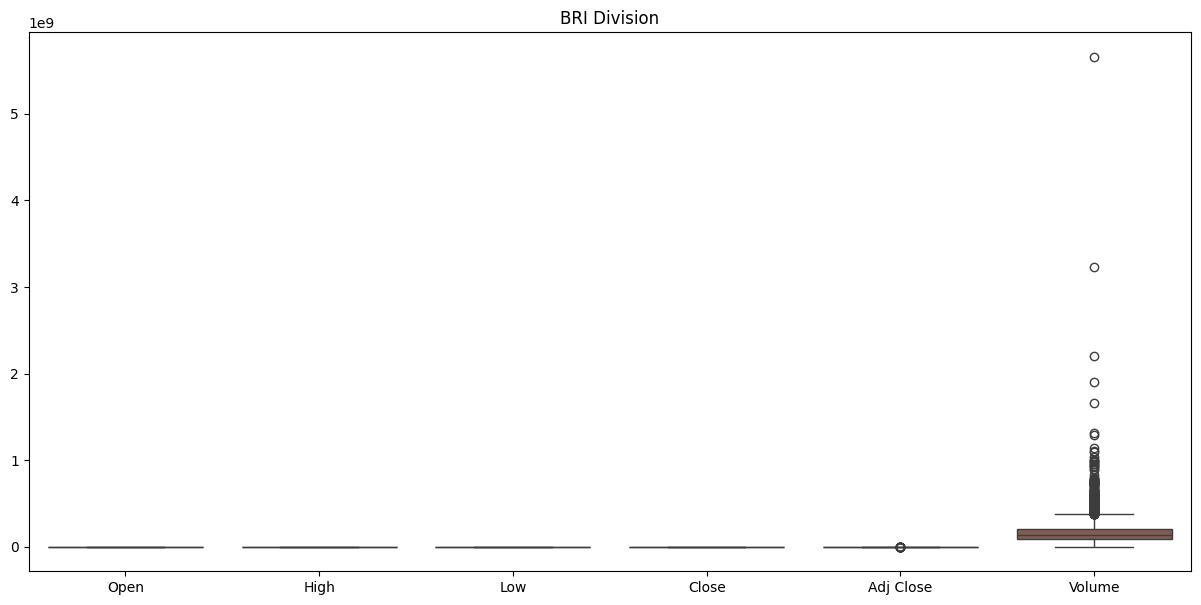

In [27]:
numerical_col = [col for col in df.columns if df[col].dtypes == 'float64' or df[col].dtypes == 'int64']
plt.subplots(figsize=(15,7))
sns.boxplot(data=df[numerical_col]).set_title("BRI Division")
plt.show()

In [28]:
col = df.columns
df[col].dtypes =='int64'

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume        True
dtype: bool

In [29]:
Q1 = df.quantile(0.25)
#queartil 1
Q3 = df.quantile(0.75)
#quartil 3
IQR = Q3-Q1
#jarak = quartil1-quartil3

df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
#df = df(lama) [ df(lama) < kuartil 1 - 1.5 * jarak ]
#df [df<100 | df >500]

df
# df.shape

Date         Open         High          Low        Close  \
7    2003-11-19    88.634834    90.907516    88.634834    90.907516   
10   2003-11-24    95.452896    95.452896    95.452896    95.452896   
11   2003-11-25    95.452896    95.452896    95.452896    95.452896   
12   2003-11-26    95.452896    95.452896    95.452896    95.452896   
13   2003-11-27    95.452896    95.452896    95.452896    95.452896   
...         ...          ...          ...          ...          ...   
5026 2024-02-07  5850.000000  5900.000000  5825.000000  5850.000000   
5060 2024-04-03  5575.000000  5675.000000  5525.000000  5625.000000   
5061 2024-04-04  5650.000000  5750.000000  5650.000000  5700.000000   
5062 2024-04-05  5625.000000  5700.000000  5625.000000  5650.000000   
5064 2024-04-17  5475.000000  5500.000000  5300.000000  5300.000000   

        Adj Close     Volume  
7       44.850452  305194771  
10      47.092976          0  
11      47.092976          0  
12      47.092976          0  
13      47.092976          0  
...           ...        ...  
5026  5635.195312  147005300  
5060  5625.000000  333518700  
5061  5700.000000  131936100  
5062  5650.000000  178817800  
5064  5300.000000  244002000  

[4724 rows x 7 columns]

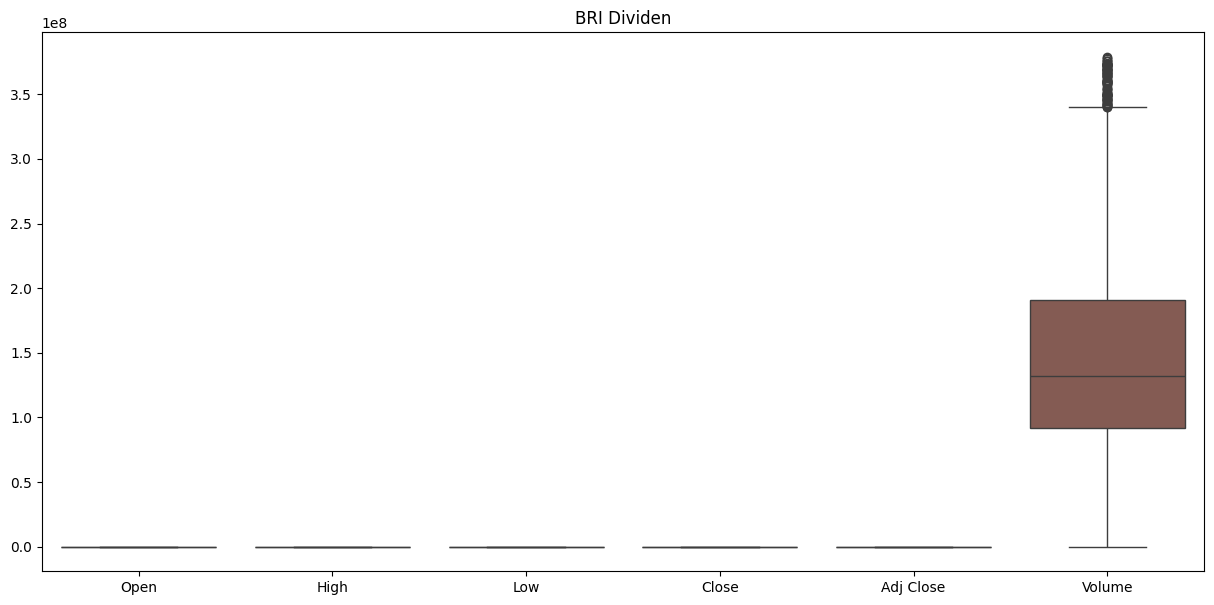

In [30]:
numerical_col = [col for col in df.columns if df[col].dtypes == 'float64' or df[col].dtypes == 'int64']
plt.subplots(figsize=(15,7))
sns.boxplot(data=df[numerical_col]).set_title("BRI Dividen")
plt.show()

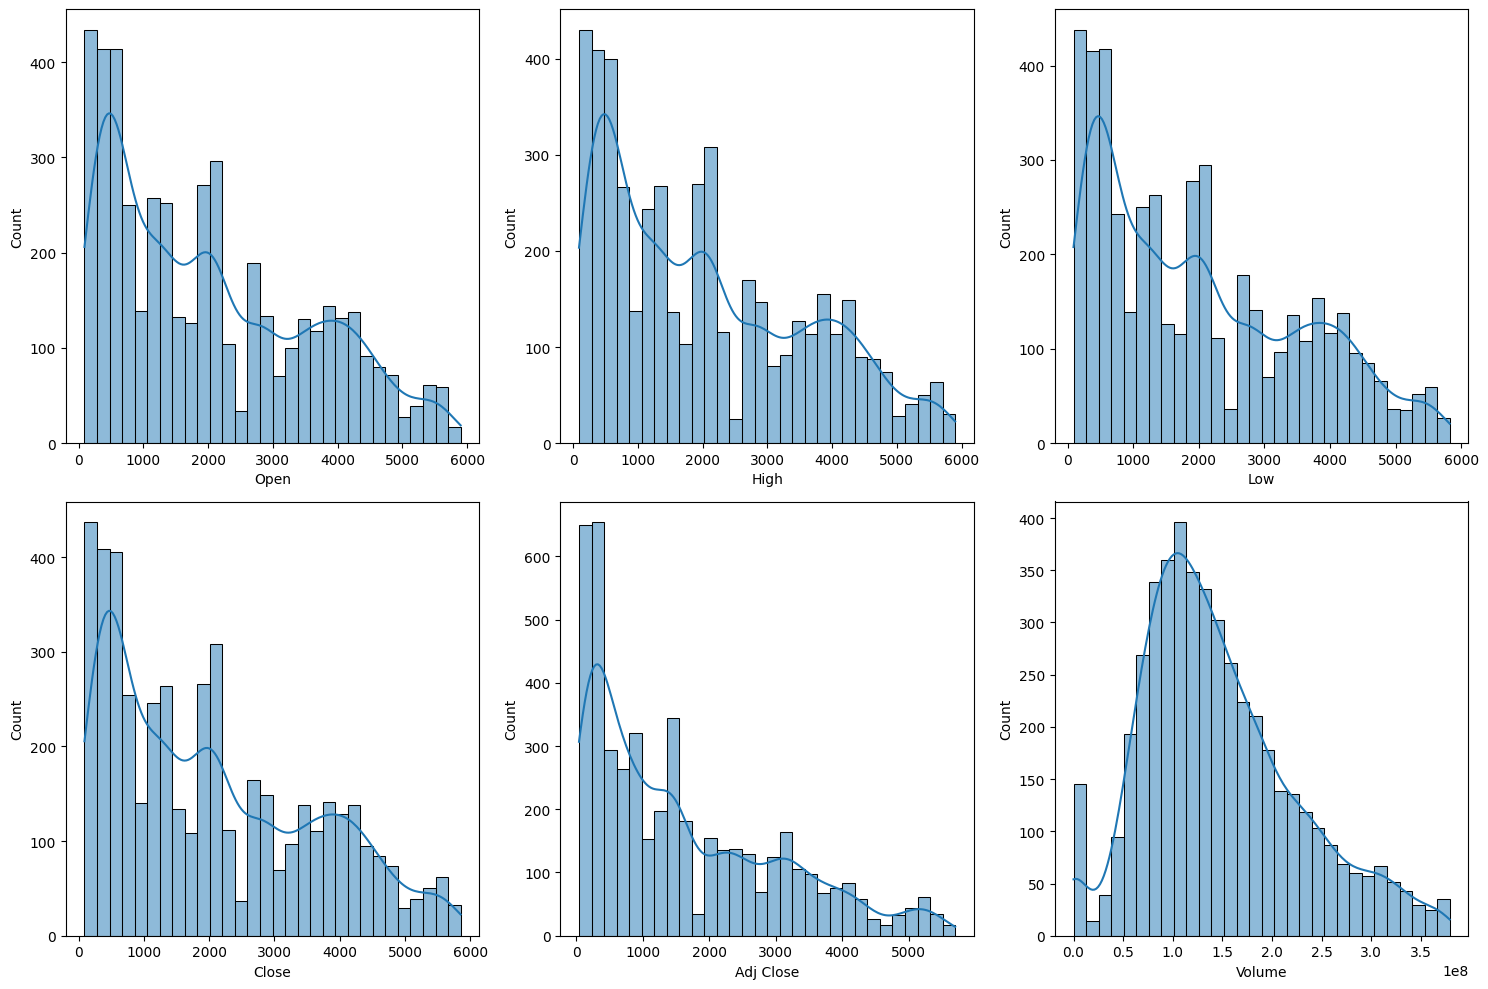

In [31]:
# Fitur yang diprediksi pada kasus ini adalah terfokus pada 'Adj Close'
cols = 3
rows = 2
fig = plt.figure(figsize=(cols * 5, rows * 5))
# ukuran figsize = 15 * 10


for i, col in enumerate(numerical_col):
    #                 0 , 0 , 1
  ax = fig.add_subplot(rows, cols, i + 1)
  sns.histplot(x=df[col], bins=30, kde=True, ax=ax)
    #df[col] diambil datanya perkolom
fig.tight_layout()
plt.show()

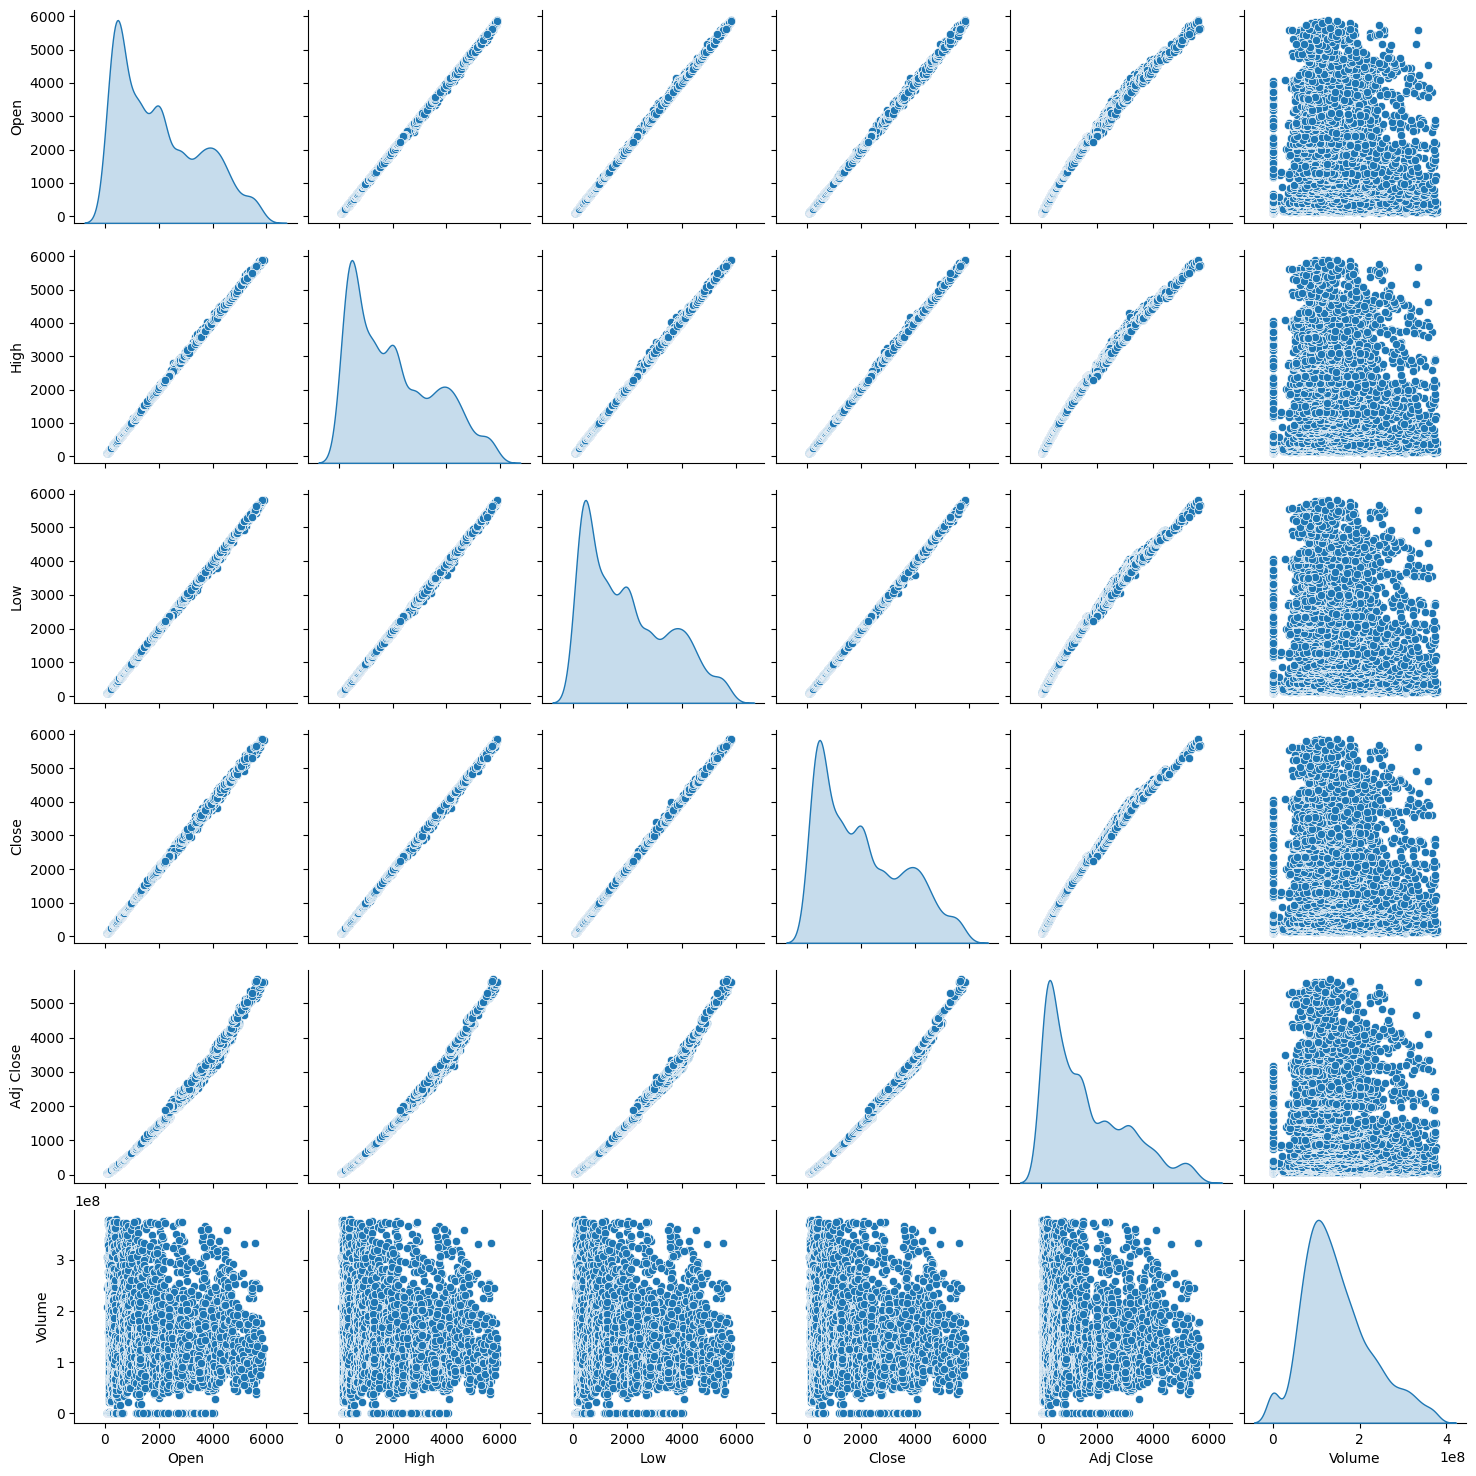

In [32]:
# Selanjutnya kita akan menganalisis korelasi fitur "Adj Close" terhadap fitur lain seperti "Open", "High", "Low", "Close" dan "Volume".
#  Dapat disimpulkan bahwa "Adj Close" memiliki korelasi positif yang kuat terhadap "Open", "High", "Low" dan "Close", 
# sedangkan untuk fitur "Volume" memiliki korelasi sedang terhadap fitur "Adj Close"
sns.pairplot(df[numerical_col], diag_kind='kde')
plt.show()


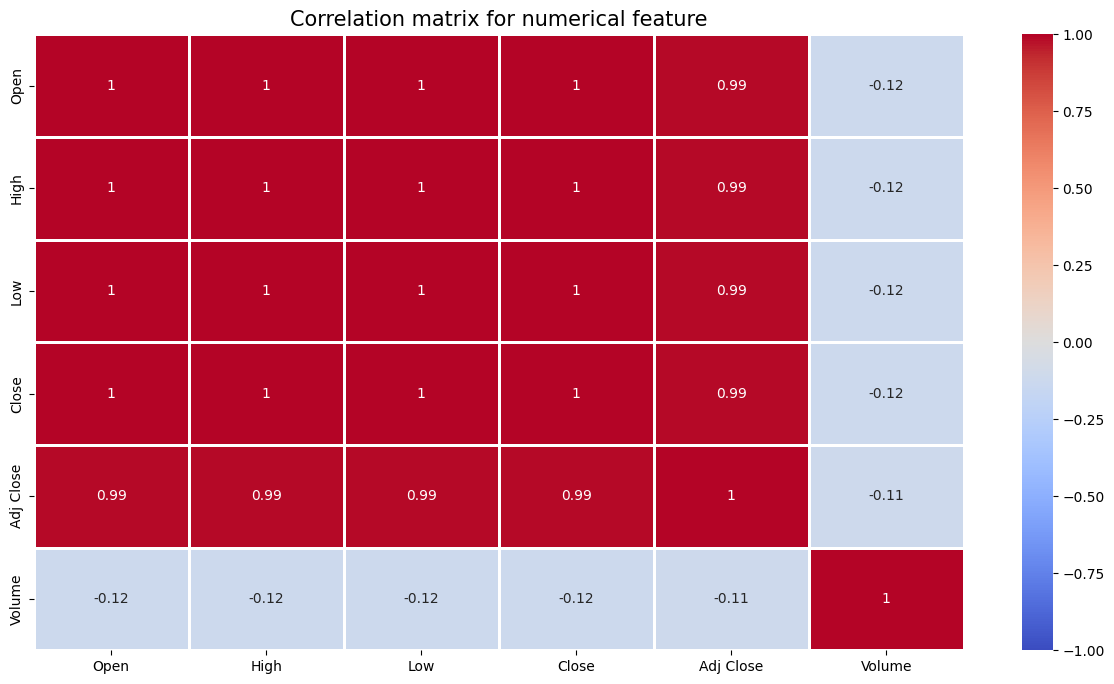

In [33]:
plt.figure(figsize=(15,8))
corr = df[numerical_col].corr().round(2)
sns.heatmap(data=corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm', linewidth=1)
plt.title('Correlation matrix for numerical feature', size=15)
plt.show()

In [34]:
df = df.drop(['Date','Volume', 'Close'], axis=1)
df.head()

Open       High        Low  Adj Close
7   88.634834  90.907516  88.634834  44.850452
10  95.452896  95.452896  95.452896  47.092976
11  95.452896  95.452896  95.452896  47.092976
12  95.452896  95.452896  95.452896  47.092976
13  95.452896  95.452896  95.452896  47.092976

**Splitting Dataset**

In [37]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [39]:
print(len(X_train), 'records')
print(len(y_train), 'records')
print(len(X_test), 'records')
print(len(y_test), 'records')

3779 records
3779 records
945 records
945 records


**Data Normalization**

Untuk melakukan normalisasi data kita akan menggunakan library MinMaxScaler. Fungsi normalisasi pada data agar model lebih cepat dalam mempelajari data karena data telah diubah pada rentang tertentu seperti antara 0 dan 1

In [21]:
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [44]:
models = pd.DataFrame(columns=['train_mse', 'test_mse'], index=['SVR', 'KNN', 'GradientBoosting'])

In [45]:
data = df.sort_index(ascending=True, axis=0)


In [48]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout, LSTM
from keras.models import Sequential
from keras.models import Sequential
df = pd.read_csv('BBRI.JK.csv')
data = df.sort_index(ascending=True, axis=0)

#membuat array data kosong dengan panjang index dari 0 - 246  , dengan 2 kolom
new_data = pd.DataFrame(index=range(0,len(df)), columns=['Date','Close'])


for i in range(0,len(df)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    
#menjadikan data date sebagai index
date = pd.to_datetime(new_data['Date'])

new_data.index = date
new_data.set_index(pd.to_datetime(new_data['Date'].values) , inplace=True)
new_data.drop('Date' , axis=1 , inplace=True)

#mengahapus label date , karena data date akan dijadikan sebagai index
#new data masih berbentuk series dengan date sebagai index

# new data sudah berubah menjadi data frame 
# menjadikan dataset menjadi 2 dimensi degan 1 kolom
# print(dataset)

data_train = new_data[0:182]

data_test = new_data[182:]
# data_test


    

2024-04-18 00:17:23.091867: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-18 00:17:23.313918: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-18 00:17:24.661702: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 00:17:28.013529: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/tmp/ipykernel_2565/3602526808.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in

<function matplotlib.pyplot.show(close=None, block=None)>

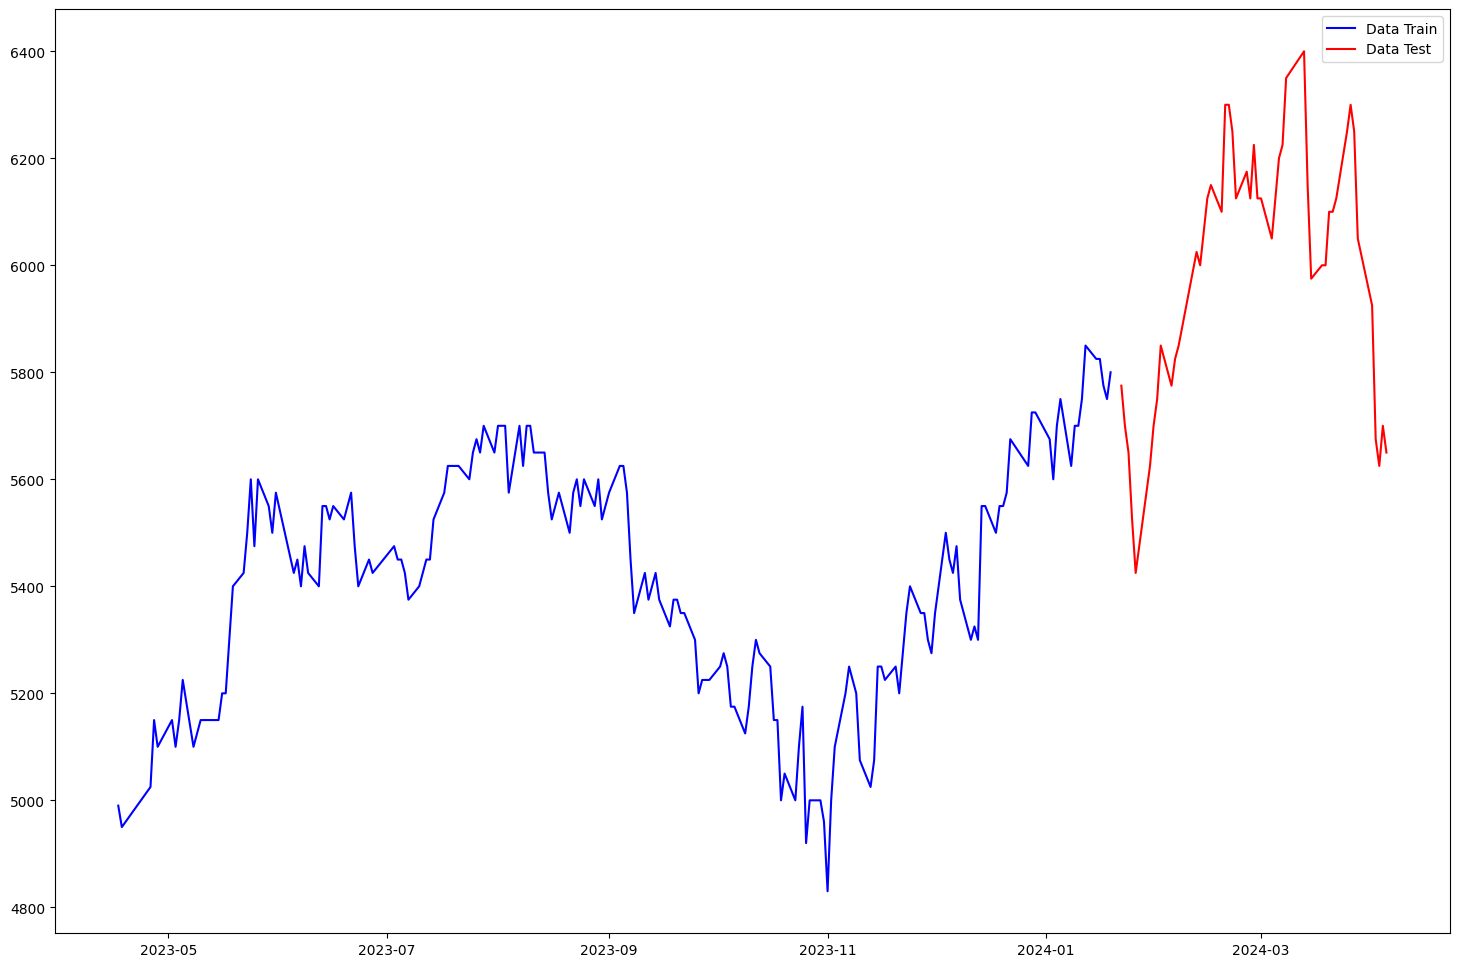

In [50]:
plt.figure(figsize=(18,12))
plt.plot(data_train['Close'],label='Data Train',color='b')
plt.plot(data_test['Close'],label='Data Test', color='r')
plt.legend()
plt.show

# plt.figure(figsize=(18,12))
# actual['Prediksi'] = closin_price
# plt.plot(train['Close'], label='valid') #182 data
# plt.plot(actual[['Close','Prediksi']] ,label='predict') #64 data dengan 2 kolom
# plt.legend()

In [52]:
# cara 2 memecah data
df = pd.read_csv('BBRI.JK.csv')
data = df.sort_index(ascending=True, axis=0)
#data= pd.to_datetime(data['Date'])

d = data[['Date']]
d = pd.to_datetime(d['Date'])
c = data[['Close']].values

new_datas = pd.DataFrame(c, index=d.values , columns=['Close'])
new_datas


#x= data.set_index('Date')
#print(x[['Close']])
#new_data = pd.DataFrame(index=range(0,len(df)), columns=['Date','Close'])

# for x in range(0,246):
#     new_data['Date'][x] = data['Date'][i]
# print(data['Date'][1])
# print(data['Date'][1])



Close
2023-04-17  4990.0
2023-04-18  4950.0
2023-04-26  5025.0
2023-04-27  5150.0
2023-04-28  5100.0
...            ...
2024-04-01  5925.0
2024-04-02  5675.0
2024-04-03  5625.0
2024-04-04  5700.0
2024-04-05  5650.0

[231 rows x 1 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

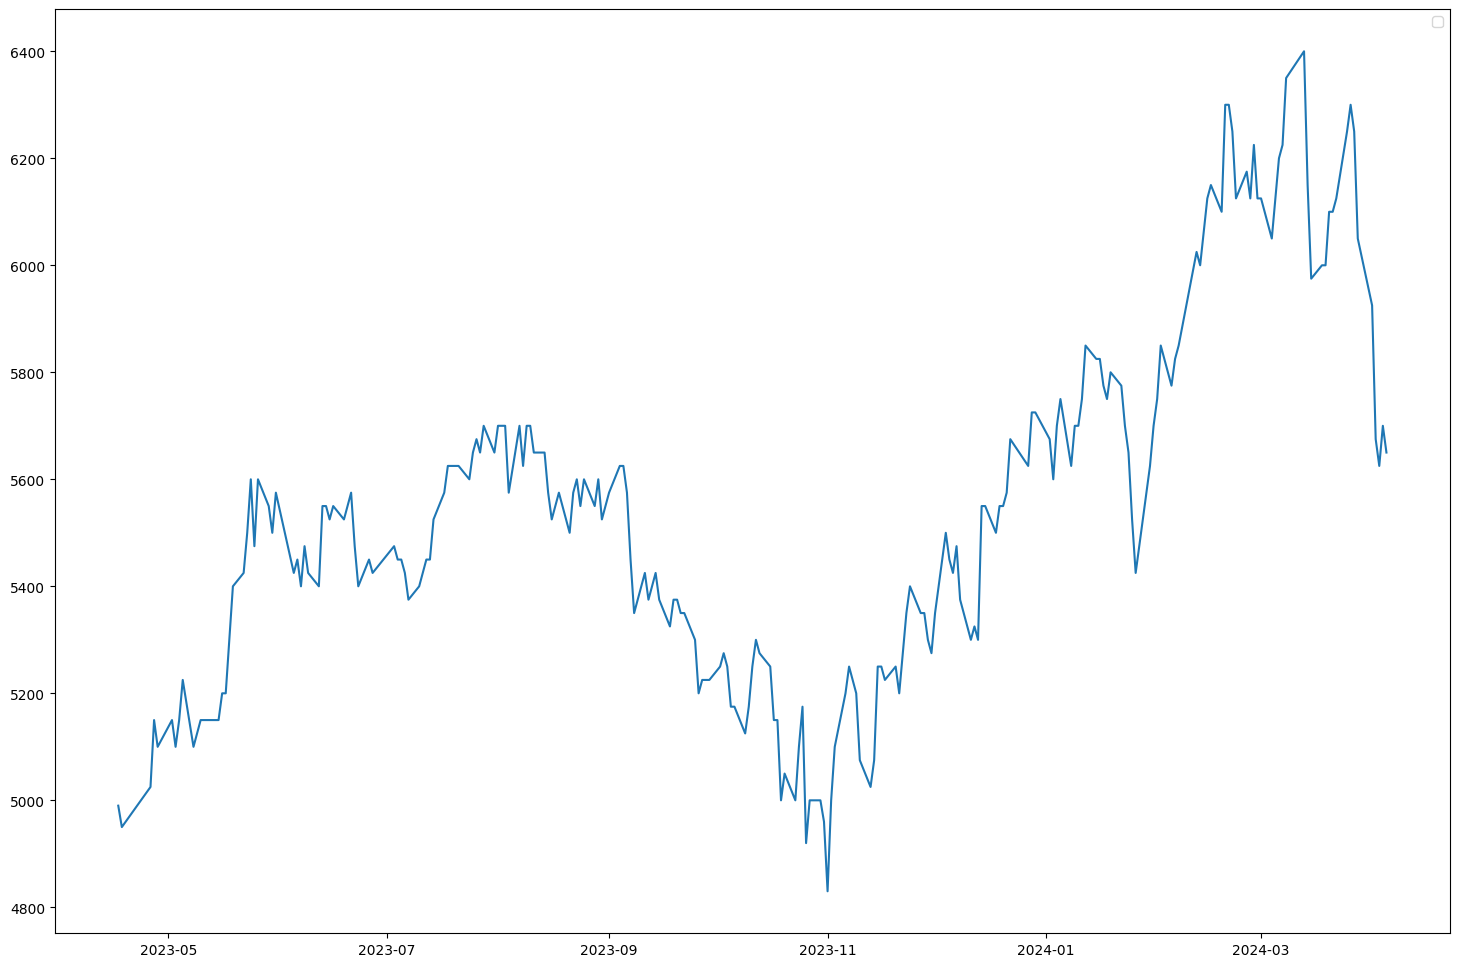

In [53]:
#grafik awal data
plt.figure(figsize=(18,12))
plt.plot(new_datas)
plt.legend()
plt.show

In [54]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(new_data[0:])


X_train , y_train = [] ,[]

for i in range(60 , len(data_train)) :
#(60,182)
    # dimulai dari data idx ke 60 yang berisi history data dari (0-60)
    # berakhri di data idx ke 182 yang berisi history data dari (60-181)
    #append data-skala[0:60,0] --> [baris_start:baris_end , kolom_ke] , data akan berjumlah 64 baris , dengan tiap baris memiliki 60 kolom menyamping
    X_train.append(scaled_data[i-60: i , 0])
#                                 0:60,0
#                                 1:61,0
#                                 2:62,0
#                                 122:182,0
    #data akan memiliki 64 baris , dengan  tiap baris memiliki 1 kolom
    y_train.append(scaled_data[i,0])
#                  0,0
#                  1,0

X_train = np.array(X_train)
y_train = np.array(y_train)
#d =X_train.reshape(7320,1)
#print(y_train.shape)

X_train = np.reshape(X_train , (X_train.shape[0], X_train.shape[1] ,1))
X_train
# membagi data dari index ke 1 - 122 menjadi 60 baris , 1 kolom , jadi tiap baris memiliki 60 data
#data di reshape kebentuk 1 kolom berjajar kebawah  agar mudah di train
  


array([[[0.10191083],
        [0.07643312],
        [0.12420382],
        ...,
        [0.49044586],
        [0.52229299],
        [0.53821656]],

       [[0.07643312],
        [0.12420382],
        [0.20382166],
        ...,
        [0.52229299],
        [0.53821656],
        [0.52229299]],

       [[0.12420382],
        [0.20382166],
        [0.17197452],
        ...,
        [0.53821656],
        [0.52229299],
        [0.55414013]],

       ...,

       [[0.14012739],
        [0.10828025],
        [0.17197452],
        ...,
        [0.64968153],
        [0.63375796],
        [0.63375796]],

       [[0.10828025],
        [0.17197452],
        [0.21974522],
        ...,
        [0.63375796],
        [0.63375796],
        [0.60191083]],

       [[0.17197452],
        [0.21974522],
        [0.05732484],
        ...,
        [0.63375796],
        [0.60191083],
        [0.58598726]]])

In [65]:
#melatih data training 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

model = Sequential()
#units = sebagai hiden layer yaitu 50 units
#input shape = input dari data yaitu 60 baris , 1 kolom
#danse artinya output yaitu ada 1 layer
#epochs artinya iterasi yaitu setiap data bakal di latih dengan jumlah batch size
#batch size = jumlah sampel yang ditraining pada tiap epoch
model.add(LSTM(units=75, return_sequences=True , input_shape=(X_train.shape[1],1))) # LSTM layer 1
model.add(LSTM(units=75)) # LSTM layer 2
model.add(Dense(1)) # output layer

model.compile(loss='mean_absolute_error' , optimizer='adam')
model.fit(X_train, y_train , epochs=100 , batch_size=1)

#hasil dari training data dengan menggunakan 100 iterasi dan dengan batch size =1 yaitu didapatkan loss sebesar 0.0656

Epoch 1/100


AttributeError: module 'keras.src.backend' has no attribute 'convert_to_numpy'

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape [1], 1)))
model.add(LSTM(units = 50, return_sequences = True)) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.compile(optimizer = 'adam',loss = 'mean_absolute_error')
model.fit(X_train, y_train, epochs = 200, batch_size = 8)

Epoch 1/200
16/16 [==============================] - 15s 123ms/step - loss: 0.2870
Epoch 2/200
16/16 [==============================] - 2s 119ms/step - loss: 0.2381
Epoch 3/200
16/16 [==============================] - 2s 119ms/step - loss: 0.2242
Epoch 4/200
16/16 [==============================] - 2s 119ms/step - loss: 0.2138
Epoch 5/200
16/16 [==============================] - 2s 123ms/step - loss: 0.2139
Epoch 6/200
16/16 [==============================] - 2s 123ms/step - loss: 0.2072
Epoch 7/200
16/16 [==============================] - 2s 121ms/step - loss: 0.2075
Epoch 8/200
16/16 [==============================] - 2s 119ms/step - loss: 0.2143
Epoch 9/200
16/16 [==============================] - 2s 119ms/step - loss: 0.2099
Epoch 10/200
16/16 [==============================] - 2s 119ms/step - loss: 0.2059
Epoch 11/200
16/16 [==============================] - 2s 119ms/step - loss: 0.2077
Epoch 12/200
16/16 [==============================] - 2s 118ms/step - loss: 0.2057
Epoch 13/200

16/16 [==============================] - 2s 119ms/step - loss: 0.1985
Epoch 100/200
16/16 [==============================] - 2s 121ms/step - loss: 0.1973
Epoch 101/200
16/16 [==============================] - 2s 119ms/step - loss: 0.2004
Epoch 102/200
16/16 [==============================] - 2s 119ms/step - loss: 0.1978
Epoch 103/200
16/16 [==============================] - 2s 119ms/step - loss: 0.1981
Epoch 104/200
16/16 [==============================] - 2s 121ms/step - loss: 0.1984
Epoch 105/200
16/16 [==============================] - 2s 122ms/step - loss: 0.2009
Epoch 106/200
16/16 [==============================] - 2s 122ms/step - loss: 0.1971
Epoch 107/200
16/16 [==============================] - 2s 120ms/step - loss: 0.2018
Epoch 108/200
16/16 [==============================] - 2s 121ms/step - loss: 0.2042
Epoch 109/200
16/16 [==============================] - 2s 119ms/step - loss: 0.1985
Epoch 110/200
16/16 [==============================] - 2s 119ms/step - loss: 0.1976
Epoch 

16/16 [==============================] - 2s 122ms/step - loss: 0.1966
Epoch 197/200
16/16 [==============================] - 2s 123ms/step - loss: 0.1979
Epoch 198/200
16/16 [==============================] - 2s 119ms/step - loss: 0.1968
Epoch 199/200
16/16 [==============================] - 2s 121ms/step - loss: 0.1976
Epoch 200/200
16/16 [==============================] - 2s 119ms/step - loss: 0.1967


In [42]:
#mempersiapkan data test

#ukuranya 124 ,1 
#karena data yang ditrain berakhir di index 182 maka data yang akan di test dimulai dari index ke 182
inputs = new_data[len(new_data)- len(data_test) - 60 : ].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

#246 - 64(panjang data test) = 182 - 60(waktu kebelakang) = 122 
#berarti data time digunakan adalah data dari index 122
#124 baris selanjutnya berarti 122+ 124 = 246

#maka bentuk dari permodelan tersebut
            #122- 182 
            #123-183
            #....
            #186-246       
            #60 , 124
x_test = []
for i in range(60 , inputs.shape[0]) :
    
    # data dimulai dari baris ke 182 berisi history data data dari [122:182]
    # data test berakhir hingga index ke 245 berisi history data dari [186:246]
    x_test.append(inputs[i-60:i ,0])
    #inputs[0:60,0]
    #berisi data dari baris ke 122 - 182
    
    #inputs[1:61,0]
    #berisi data baris ke 123 -183
    #....
    #inputs[60-124,0] berisi baris ke 186-246 
    #print(i-60 , i)
    
X_test = np.array(x_test)   

#246-64-60 = 122 baris
#print(X_test.shape)
x_test = np.reshape(X_test , (X_test.shape[0], X_test.shape[1],1))
# membagi data dari index ke 1 - 124 menjadi 60 baris , dalam format 1 kolom berjejer ke bawah
#print(x_test)
#membagi data berdasarkan index
x_test.shape

closing_price = model.predict(x_test)

closin_price = scaler.inverse_transform(closing_price)
print(closin_price)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2/2 [==============================] - 3s 69ms/step
[[4270.0723]
 [4264.8896]
 [4255.769 ]
 [4316.019 ]
 [4293.576 ]
 [4333.2456]
 [4328.228 ]
 [4335.7397]
 [4361.475 ]
 [4352.433 ]
 [4344.475 ]
 [4340.1206]
 [4340.386 ]
 [4359.471 ]
 [4309.3076]
 [4320.6304]
 [4294.5938]
 [4276.777 ]
 [4254.5586]
 [4266.0557]
 [4249.779 ]
 [4231.7393]
 [4237.722 ]
 [4231.4473]
 [4220.1553]
 [4216.1606]
 [4202.7188]
 [4203.4004]
 [4242.291 ]
 [4281.7974]
 [4341.3643]
 [4461.735 ]
 [4509.6475]
 [4476.0786]
 [4558.567 ]
 [4576.233 ]
 [4554.236 ]
 [4559.931 ]
 [4551.9683]
 [4568.704 ]
 [4499.911 ]
 [4543.1523]
 [4484.2217]
 [4527.214 ]
 [4526.472 ]
 [4498.234 ]
 [4523.993 ]
 [4520.898 ]
 [4520.8   ]
 [4500.0586]
 [4496.814 ]
 [4511.1826]
 [4572.2227]
 [4551.0205]
 [4532.8687]
 [4483.125 ]
 [4422.4917]
 [4431.0215]
 [4395.811 ]
 [4364.3135]
 [4308.834 ]
 [4296.1973]
 [4267.602 ]
 [4254.197 ]]


In [43]:
train = new_data[:182]
actual = new_data[182:]
#print(train.shape)
actual['Prediksi'] = closin_price
print(actual)
#artinya dari model tersebut memprediksi 64 baris kedepan dengan menggunakan 60 baris kebelakang

             Close     Prediksi
2022-07-22  4270.0  4270.072266
2022-07-25  4250.0  4264.889648
2022-07-26  4330.0  4255.769043
2022-07-27  4320.0  4316.019043
2022-07-28  4360.0  4293.576172
...            ...          ...
2022-10-14  4270.0  4364.313477
2022-10-17  4300.0  4308.833984
2022-10-18  4290.0  4296.197266
2022-10-19  4300.0  4267.602051
2022-10-20  4390.0  4254.196777

[64 rows x 2 columns]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1208\2061554327.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['Prediksi'] = closin_price


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1208\973515010.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['Prediksi'] = closin_price


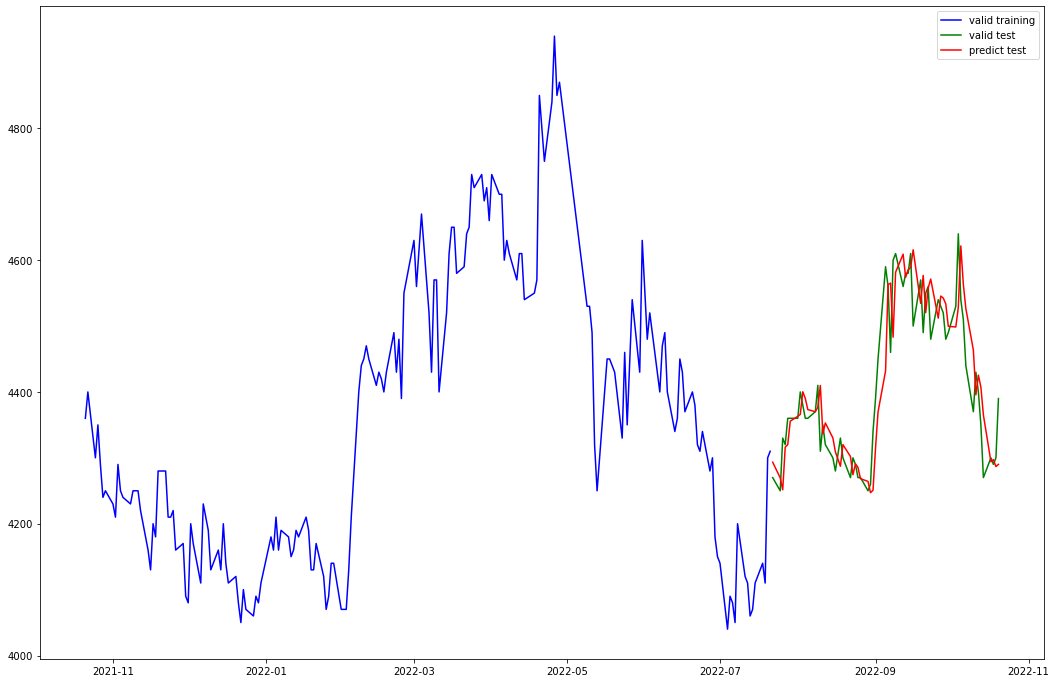

In [39]:
train = new_data[:182]
actual = new_data[182:]

plt.figure(figsize=(18,12))
actual['Prediksi'] = closin_price
plt.plot(train['Close'], label='valid training', color='b') #182 data
plt.plot(actual[['Close']] ,label='valid test' , color='g') #64 data dengan 2 kolom
plt.plot(actual[['Prediksi']] ,label='predict test' , color='r')
plt.legend()
#warna ijo prediksi
#warna biru dan orangge = data asli 

In [ ]:
#grafik berwarna biru menunjukan data actula hingga pertengahan juli 2022
#grafik orange menunjukan data actual yang akan digunakan untuk membadingkan hasil prediksi
#grafik hijau merupakan data hasil prediksi 
#pada grafik diatas , dapat dilihat bahwa model yang telah dibuat , hampir dapat memprediksi data dengan tepat , walaupun belum sempurna


In [44]:
new_data

Close
2021-10-21  4360.0
2021-10-22  4400.0
2021-10-25  4300.0
2021-10-26  4350.0
2021-10-27  4290.0
...            ...
2022-10-14  4270.0
2022-10-17  4300.0
2022-10-18  4290.0
2022-10-19  4300.0
2022-10-20  4390.0

[246 rows x 1 columns]

In [49]:
a= (new_data.index)
a
#test = pd.DataFrame(index=new_data.index + 100 , columns=['close'])

DatetimeIndex(['2021-10-21', '2021-10-22', '2021-10-25', '2021-10-26',
               '2021-10-27', '2021-10-28', '2021-10-29', '2021-11-01',
               '2021-11-02', '2021-11-03',
               ...
               '2022-10-07', '2022-10-10', '2022-10-11', '2022-10-12',
               '2022-10-13', '2022-10-14', '2022-10-17', '2022-10-18',
               '2022-10-19', '2022-10-20'],
              dtype='datetime64[ns]', length=246, freq=None)

In [55]:
dataBaru = pd.DataFrame(index=['2022-10-21', '2022-10-22','2022-10-23','2022-10-24','2022-10-25','2022-10-26','2022-10-27','2022-10-28'],columns=['Close'])

2/2 [==============================] - 0s 84ms/step


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1208\2678595434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['Prediksi'] = closing_price


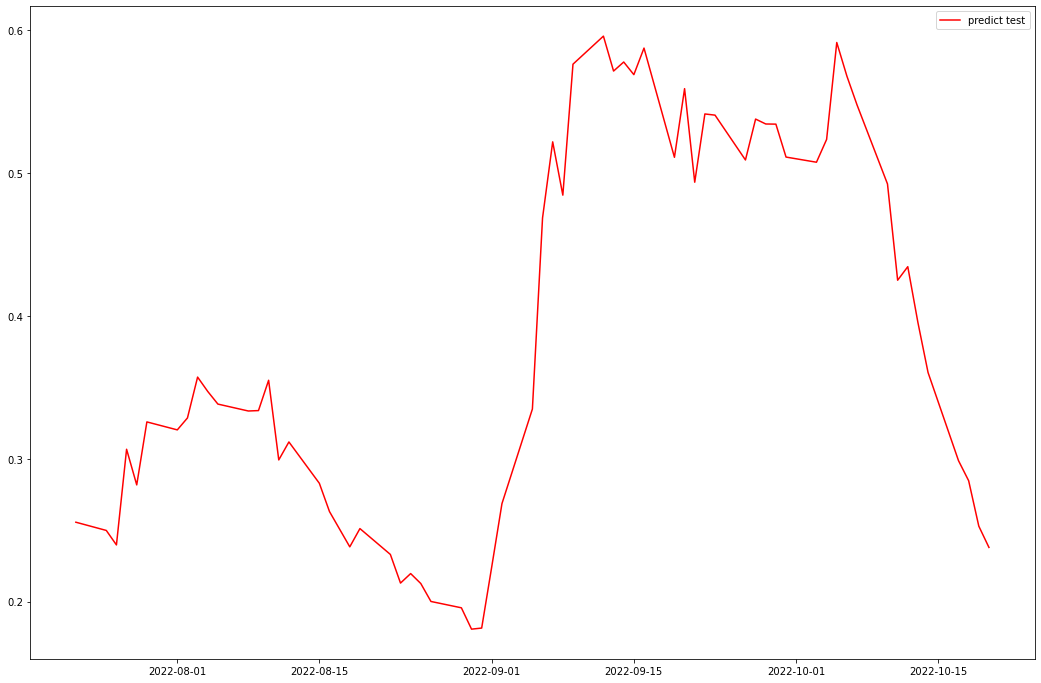

In [58]:
closing_price = model.predict(x_test)
closing_price

plt.figure(figsize=(18,12))
actual['Prediksi'] = closing_price
# plt.plot(train['Close'], label='valid training', color='b') #182 data
# plt.plot(actual[['Close']] ,label='valid test' , color='g') #64 data dengan 2 kolom
plt.plot(actual[['Prediksi']] ,label='predict test' , color='r')
plt.legend()